In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
import seaborn as sns; sns.set_theme()
from collections import defaultdict
from glob import glob
plt.rcParams.update({'figure.max_open_warning': 0})
import functions

In [2]:
from importlib import reload
reload(functions)

<module 'functions' from '/home/rcls/codigos/git-projects/interaction-network-examples/notebooks/Journal/functions.py'>

In [3]:
os.chdir('../../')

# GWO

In [7]:
print(os.getcwd())
dimension=50
folder = f'analysis_interaction_graph/{dimension}d/gwo_results/'
func = 'Rastrigin'
intype = 'euclidian'
algo = 'GWO'
simu_size = int(input("Quantidade de simulações: ")) # 10
agents = 100
evaluations = 100000

/home/rcls/codigos/git-projects/interaction-network-examples
Quantidade de simulações: 10


In [8]:
#for simulation in []:
results = defaultdict(dict)
for simulation in range(0,simu_size):
    results_file = f"{algo}_{func}_intype_{intype}_improved_False_init_Uniform_it_1000_dim_{dimension}_swarm_{agents}_eval_{evaluations}_sim_{simulation:02d}_interaction_graph.txt"
    data = np.loadtxt(folder + results_file)
    results_file_fit = f"{algo}_{func}_intype_{intype}_improved_False_init_Uniform_it_1000_dim_{dimension}_swarm_{agents}_eval_{evaluations}_sim_{simulation:02d}_best_fitness_through_iterations.txt"
    agents = len(data[0])
    data_transformed = data.reshape(agents, agents)
    fit = functions.readLastLine(folder + results_file_fit)
    results[simulation] = {'data':data_transformed, 
                           'fname': os.path.splitext(results_file)[0],
                           'fit': fit,
                          }

## Heatmap using normalized data

100
['1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '100']
100
['1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '100']
100
['1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 

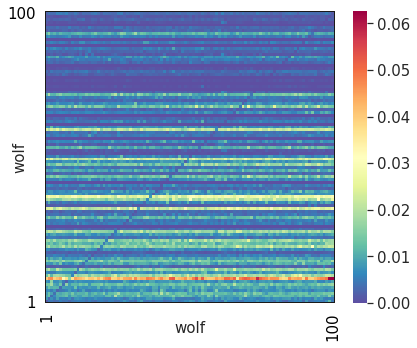

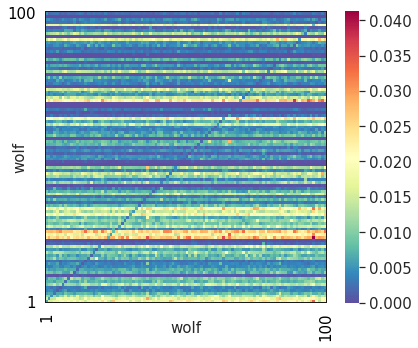

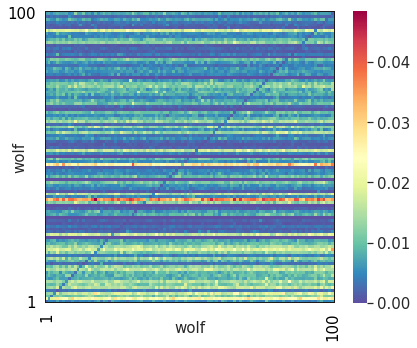

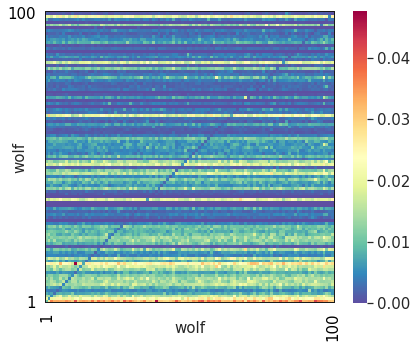

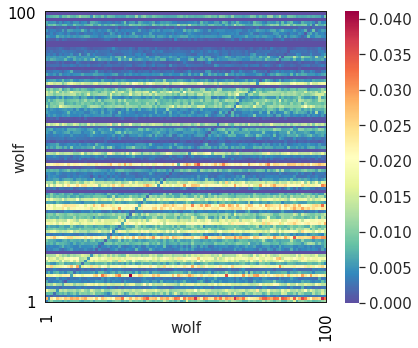

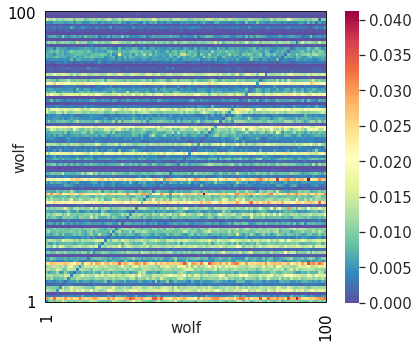

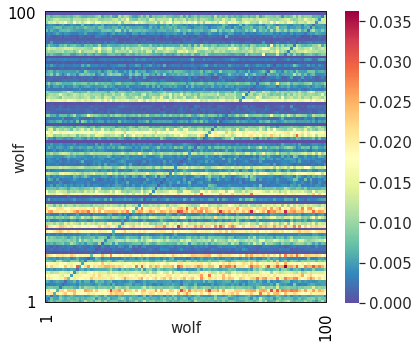

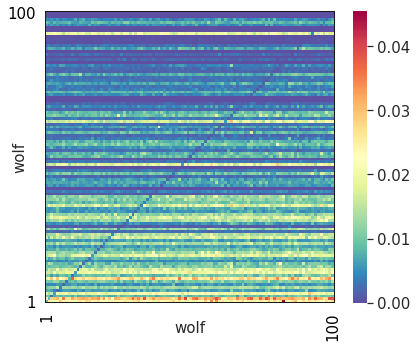

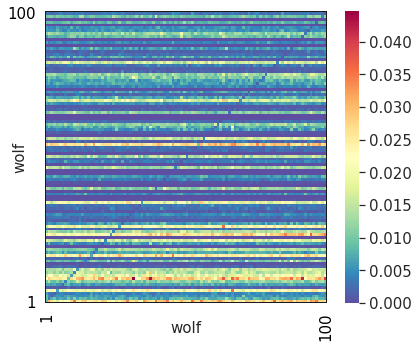

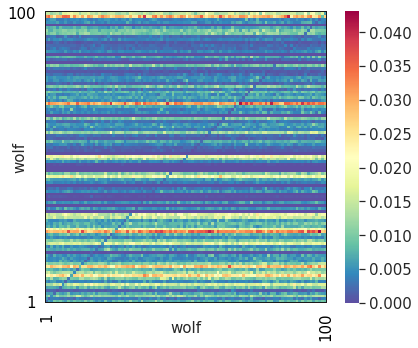

In [10]:
heatmap_normalized_folder = folder+"/nb-heatmaps/normalized/"
if not os.path.exists(heatmap_normalized_folder):
    os.makedirs(heatmap_normalized_folder)

font_size_out=10
for simulation in range(simu_size):
    data = results[simulation]['data']
    normalized_data = data / np.sqrt((np.sum(data**2)))
    fit = results[simulation]['fit'] 
    fname = results[simulation]['fname'] + "_normalized.png"
    fig, ax = plt.subplots(figsize = (6,5))
    #plt.title(f"Simulation #{simulation} normalized - Fitness: {fit}", fontsize =20)
    sns.heatmap(normalized_data, annot=False, cmap="Spectral_r", vmin = 0, ax=ax, xticklabels= True, yticklabels = True)
    

    tam = len(data[0])
    #print(tam)
    labels = [""] * tam
    labels[0]= '1'
    labels[-1]= f'{tam}'
    #print(labels)
    
    ax.set_yticklabels(labels)
    ax.set_ylabel("wolf", fontsize=font_size_out*1.5, labelpad = -20)

    ax.set_xticklabels(labels) 
    ax.set_xlabel("wolf", fontsize=font_size_out*1.5, labelpad = -20)

    ax.tick_params('x', colors="black", labelsize=font_size_out*1.5)
    ax.tick_params('y', colors="black", labelsize=font_size_out*1.5)
    
    ax.axhline(y = 0, color = 'k', 
        linewidth = 2)

    ax.axhline(y = agents, color = 'k',
            linewidth = 2)

    ax.axvline(x = 0, color = 'k',
            linewidth = 2)

    ax.axvline(x = agents, color = 'k',
            linewidth = 2)

        
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=font_size_out*1.5)
    
    
    ax.invert_yaxis()
    plt.tight_layout()
    plt.savefig(heatmap_normalized_folder+fname)
    #plt.close()

## Heatmap using raw data

In [17]:
#%%script false --no-raise-error

heatmap_folder=folder+"/nb-heatmaps/raw/"
if not os.path.exists(heatmap_folder):
    os.makedirs(heatmap_folder)

for simulation in range(simu_size):
    data = results[simulation]['data']
    fname = results[simulation]['fname'] + ".png"
    fit = results[simulation]['fit'] 
    plt.figure(figsize = (8,6))
    plt.title(f"Simulation #{simulation} - Fitness: {fit}", fontsize = 20)
    ax = sns.heatmap(data, annot=False, cmap="Spectral_r")
    ax.invert_yaxis()
    ax.axhline(y = 0, color = 'k', 
        linewidth = 2)

    ax.axhline(y = agents, color = 'k',
            linewidth = 2)

    ax.axvline(x = 0, color = 'k',
            linewidth = 2)

    ax.axvline(x = agents, color = 'k',
            linewidth = 2)
    fig = ax.get_figure()
    plt.tight_layout()
    fig.savefig(heatmap_folder+fname)
    plt.close()
